In [1]:
import librosa
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import librosa.display 
import skimage

%matplotlib inline

In [32]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def spectrogram_image(y, sr, hop_length, n_mels):
    mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=hop_length*2, hop_length=hop_length)
    mels = np.log(mels + 1e-9) 
    
    img = scale_minmax(mels, 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0) 
    img = 255-img # invert. make black==more energy

    # save as PNG
    skimage.io.imsave("spectrogram.png", img)

    
def mfcc_image(y, sr):
    mfcc_feat = librosa.feature.mfcc(y= y,sr = sr)
    d = librosa.amplitude_to_db(np.abs(mfcc_feat), ref=np.max)
 
    
    img = scale_minmax(d, 0, 255).astype(np.uint8)
    
    img = np.flip(img, axis=0) 
    img = 255-img # invert. make black==more energy

    # save as PNG
    skimage.io.imsave("mfcc.png", img)


In [2]:
file = "../../data/raw_data/wav_files/10_1.wav"
hop_length = 512 
n_mels = 128 
time_steps = 384


In [3]:
y, sr = librosa.load(file)

In [4]:
print(y.shape)

(110250,)


In [38]:
# spectrogram_image(y, sr=sr, hop_length=hop_length, n_mels=n_mels)
mfcc_image(y,sr)
#     print('wrote file', out)

In [39]:
d = librosa.amplitude_to_db(np.abs(mfcc_feat), ref=np.max)
librosa.display.specshow(d, x_axis='time')
ax = plt.subplot(111)
ax.get_xaxis().set_visible(False)
plt.tight_layout()

NameError: name 'mfcc_feat' is not defined

In [98]:
spectorgram_feat = librosa.feature.melspectrogram(y=y, sr=sr)

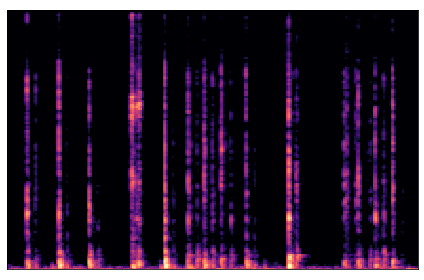

In [99]:
d = librosa.amplitude_to_db(np.abs(spectorgram_feat), ref=np.max)

librosa.display.specshow(d, x_axis='time')
ax = plt.subplot(111)
ax.get_xaxis().set_visible(False)
plt.tight_layout()